## HLS and Color Thresholds

![](images/test6.jpg)

You've now seen that various color thresholds can be applied to find the lane lines in images. Here we'll explore this a bit further and look at a couple examples to see why a color space like HLS can be more robust. Let's first take another look at some of the images you saw in the last video.

Here I'll read in the same original image (the image above), convert to grayscale, and apply a threshold that identifies the lines:

```python
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('images/test6.jpg')
thresh = (180, 255)
gray = cv2.cvtColor(cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1
```

And here's the result:
![](images/test6gray.jpg)


You might have also explored thresholding individual RGB color channels. You can take a look at them side by side to see which ones do a better job of picking up the lane lines:

```python
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]
```

![](images/test6rgb.jpg)

The R channel does a reasonable job of highlighting the lines, and you can apply a similar threshold to find land-line pixels:

```python
thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1
```

![](images/test6r-channel.jpg)


In this lesson, we're looking at different color spaces. While there are several that are worth exploring, here we'll look specifically at HLS. When we separate the H, L, and S channels we get the following result:

```python
hls = cv2.cvtColor(image, cv2.RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]
```
![](images/test6hls.jpg)

The S channel picks up the lines well, so let's try applying a threshold there:

```python
thresh = (90, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1
```

![](images/test6s-channel.jpg)

You can also see that in the H channel, the lane lines appear dark, so we could try a low threshold there and obtain the following result:

```python
thresh = (15, 100)
binary = np.zeros_like(H)
binary[(H > thresh[0]) & (H <= thresh[1])] = 1
```

![](images/test6h-channel.jpg)

From these examples, you can see that the S channel is probably your best bet. It's cleaner than the H channel result and a bit better than the R channel or simple grayscaling. But it's not clear that one method is far superior to the others.

In each case, I've tweaked the threshold parameters to do as good a job as possible of picking out the lines. Where we can really see a difference in results, however, is when we step to a new frame, where there are shadows and different colors in the pavement. Look at the same thresholds applied to each of these four channels for this image:

![](images/test4.jpg)

Here's how the various channels and binaries (with the same threshold values as above) look:

![](images/test4gray.jpg)
![](images/test4r-channel.jpg)
![](images/test4s-channel.jpg)
![](images/test4h-channel.jpg)

Now you can see that, the S channel is still doing a fairly robust job of picking up the lines under very different color and contrast conditions, while the other selections look messy. You could tweak the thresholds and get closer in the other channels, but the S channel is preferable because it is more robust to changing conditions.

It's worth noting, however, that the R channel still does rather well on the white lines, perhaps even better than the S channel. As with gradients, it's worth considering how you might combine various color thresholds to make the most robust identification of the lines.

## Exercise

![](images/hls-binary.jpg)

In this exercise, you can try applying a color threshold in the HLS color space. 
Your task here is to write a function that takes in an image and threshold values and returns a binary output from applying the threshold to the S-channel. Apply your thresholds as you did for gradients but this time use an exclusive(`>`) lower bound and an inclusive upper bound (`<=`).

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [4]:
# Read in an image
image = mpimg.imread('images/test6.jpg')

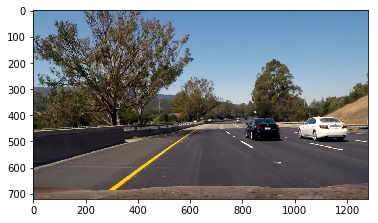

In [5]:
plt.imshow(image)

In [30]:
def hls_select(img, thresh=(0, 255)):
    # Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    # Apply a threshold to S channel
    binary_output = np.zeros_like(hls[:,:,2])
    binary_output[(hls[:,:,2] > thresh[0]) & (hls[:,:,2] <= thresh[1])] = 1 
    return binary_output

Text(0.5,1,'Thresholded S')

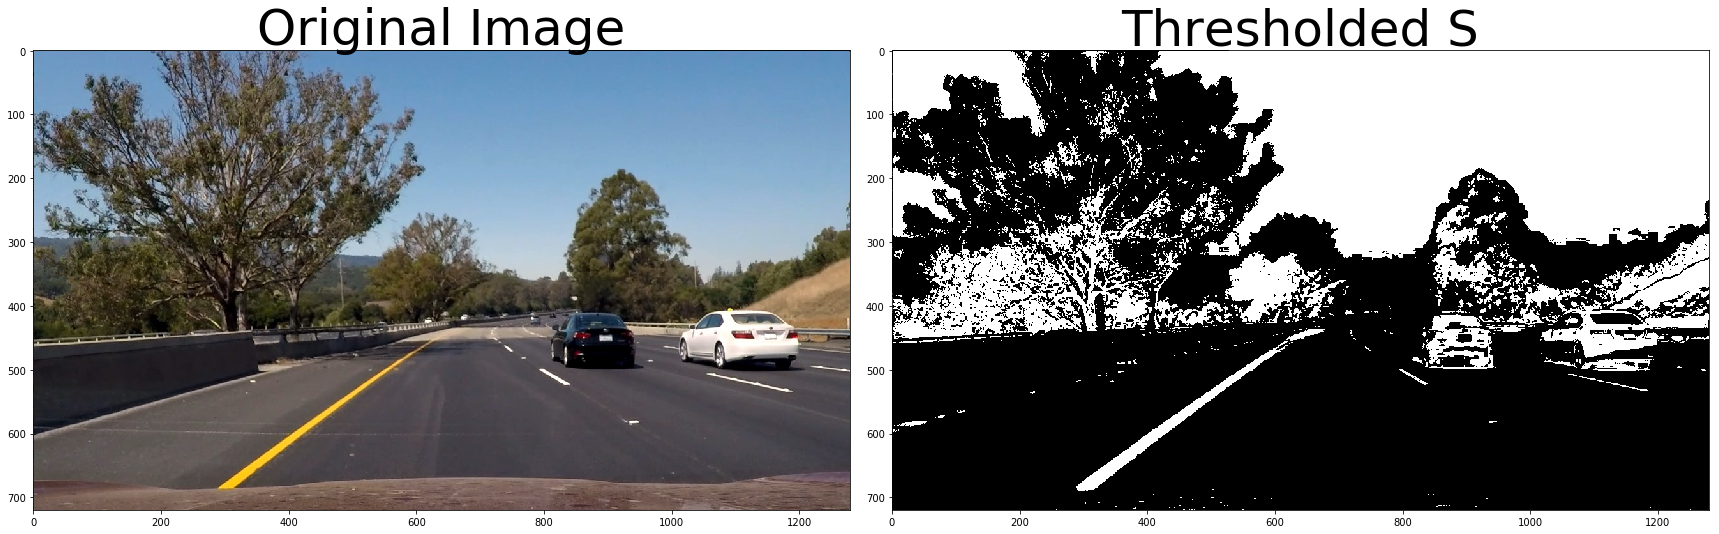

In [31]:
hls_binary = hls_select(image, thresh=(70, 255))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=50)